### Association Rule

#### Prepare rules for the all the data sets 
- Book dataset

In [1]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [2]:
data = pd.read_csv("book.csv")
data.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


# Apriori Algorithm 

### min_support = 0.1

In [3]:
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
frequent_itemsets.head()

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)


Text(0, 0.5, 'support')

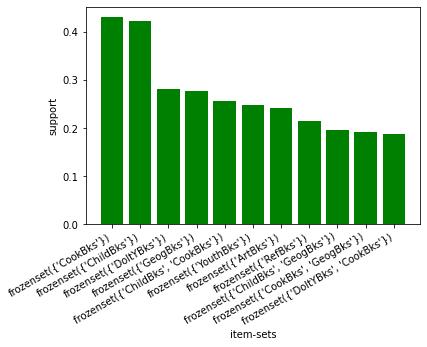

In [4]:
# Most Frequent item sets based on support 
frequent_itemsets.sort_values('support',ascending = False,inplace=True)
import matplotlib.pyplot as plt
plt.bar(list(range(0,11)), frequent_itemsets.support[0:11], color = "green")
plt.xticks(list(range(0,11)),frequent_itemsets.itemsets[0:11])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('item-sets')
plt.ylabel('support')

In [5]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
95,(DoItYBks),"(CookBks, ArtBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
96,(CookBks),"(DoItYBks, ArtBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
98,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [6]:
rules.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
63,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
86,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
91,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
92,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
80,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
85,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
81,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
84,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


In [7]:
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
3,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
4,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
...,...,...,...,...,...,...,...,...,...
95,(DoItYBks),"(CookBks, ArtBks)",0.2820,0.1670,0.1015,0.359929,2.155264,0.054406,1.301418
96,(CookBks),"(DoItYBks, ArtBks)",0.4310,0.1235,0.1015,0.235499,1.906873,0.048272,1.146499
97,(ArtBks),"(DoItYBks, CookBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
98,(YouthBks),(ArtBks),0.2475,0.2410,0.1010,0.408081,1.693281,0.041353,1.282270


In [8]:
########################## To eliminate Redudancy in Rules #################################### 
def to_list(i):
    return (sorted(list(i)))

In [9]:
ma_X = rules.antecedents.apply(to_list)+rules.consequents.apply(to_list)
ma_X = ma_X.apply(sorted)
ma_X

0             [ChildBks, CookBks]
1             [ChildBks, CookBks]
2             [ChildBks, GeogBks]
3             [ChildBks, GeogBks]
4              [CookBks, GeogBks]
                 ...             
95    [ArtBks, CookBks, DoItYBks]
96    [ArtBks, CookBks, DoItYBks]
97    [ArtBks, CookBks, DoItYBks]
98             [ArtBks, YouthBks]
99             [ArtBks, YouthBks]
Length: 100, dtype: object

In [10]:
rules_sets = list(ma_X)
unique_rules_sets = [list(m) for m in set(tuple(i) for i in rules_sets)]
index_rules = []
for i in unique_rules_sets:
    index_rules.append(rules_sets.index(i))

In [11]:
# getting rules without any redudancy 
rules_no_redudancy  = rules.iloc[index_rules,:]

In [12]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
86,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
92,"(DoItYBks, CookBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
80,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
52,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
22,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
66,"(DoItYBks, CookBks)",(GeogBks),0.1875,0.2760,0.1085,0.578667,2.096618,0.056750,1.718354
74,"(DoItYBks, ChildBks)",(GeogBks),0.1840,0.2760,0.1045,0.567935,2.057735,0.053716,1.675673
44,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
42,(ArtBks),(GeogBks),0.2410,0.2760,0.1275,0.529046,1.916832,0.060984,1.537304


# Apriori Algorithm 

### min_support = 0.2

In [13]:
frequent_itemsets1 = apriori(data, min_support=0.2, use_colnames=True)
frequent_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"


Text(0, 0.5, 'support')

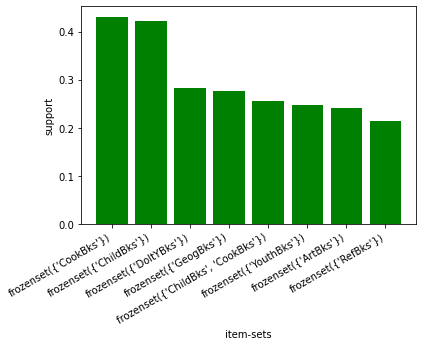

In [14]:
# Most Frequent item sets based on support 
frequent_itemsets1.sort_values('support',ascending = False,inplace=True)
import matplotlib.pyplot as plt
plt.bar(list(range(0,8)), frequent_itemsets1.support[0:8], color = "green")
plt.xticks(list(range(0,8)),frequent_itemsets1.itemsets[0:8])
ax= plt.subplot()
plt.setp(ax.get_xticklabels(), rotation=30, ha='right')
plt.xlabel('item-sets')
plt.ylabel('support')

In [15]:
rules1 = association_rules(frequent_itemsets1, metric="lift", min_threshold=1)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


#####  An leverage value of 0 indicates independence. Range will be [-1 1]
A high conviction value means that the consequent is highly depending on the antecedent and range [0 inf]

In [16]:
rules1.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [17]:
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069


In [18]:
ma_X1 = rules1.antecedents.apply(to_list)+rules1.consequents.apply(to_list)
ma_X1 = ma_X1.apply(sorted)
ma_X1

0    [ChildBks, CookBks]
1    [ChildBks, CookBks]
dtype: object

In [19]:
rules_sets1 = list(ma_X1)
rules_sets1

[['ChildBks', 'CookBks'], ['ChildBks', 'CookBks']]

In [20]:
unique_rules_sets1 = [list(m) for m in set(tuple(i) for i in rules_sets1)]
unique_rules_sets1

[['ChildBks', 'CookBks']]

In [21]:
index_rules1 = []
for i in unique_rules_sets1:
    index_rules1.append(rules_sets1.index(i))

In [22]:
# getting rules without any redudancy 
rules_no_redudancy1  = rules1.iloc[index_rules1,:]

In [23]:
# Sorting them with respect to list and getting top 10 rules 
rules_no_redudancy1.sort_values('lift',ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.44124
